## Prediction of Fuel(petrol, diesel) Prices of Bhutan
### Group 12:
    
- GALEY WANGMO (12190051)
- GYELTSHEN WANGDI (12190053)
- TSHERING DORJEE (12190093)
- UGYEN WANGDI (12190105)

# 1. Importing Libraries 

Importing all the necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- Reading the file and displaying first five and last five records.

In [4]:
df = pd.read_csv('bhutan_fuel_prices.csv')
df.head()

Region      Product                               Company  \
0  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
1  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
2  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
3  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
4  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   

  Approved_Date        Station     RSP/KL   RSP/L  
0    2022-04-01  Phuentsholing   98497.76   98.50  
1    2022-04-01    Rinchending   98578.22   98.58  
2    2022-04-01        Pasakha   98631.86   98.63  
3    2022-04-01     Chimakothi  100206.55  100.21  
4    2022-04-01   Lungtenzampa  100650.06  100.65

In [5]:
df.shape

(11378, 7)

## 2.2.  Printing summary of the dataset

In [6]:
df.describe()

RSP/KL         RSP/L
count   11377.000000  11377.000000
mean    63861.075735     63.830219
std     13877.545175     13.916225
min         0.000000      0.000000
25%     54723.670000     54.680000
50%     63047.280000     63.050000
75%     72826.080000     72.830000
max    103511.930000    103.510000

In [7]:
len(df.Station.unique())


69

## 2.3. Check null values in the dataset

In [8]:
df.isnull().sum()

Region            0
Product           1
Company          16
Approved_Date     1
Station          30
RSP/KL            1
RSP/L             1
dtype: int64

## 2.4. Check datatypes of all the columns

In [9]:
df.dtypes

Region            object
Product           object
Company           object
Approved_Date     object
Station           object
RSP/KL           float64
RSP/L            float64
dtype: object

## 2.5 Cleaning data
- Checking for some columns which may contains irrelevent values

- There are values as "(in KL)" in Product column. Replace them with product name.

In [10]:
df.Product.value_counts()


HSD (in KL)    5745
MS (in KL)     5614
SKO (in KL)      18
Name: Product, dtype: int64

#### Drop the rows which has Product as 'SKO (in KL)'

In [11]:

index_names = df[ df['Product'] == 'SKO (in KL)' ].index
  
# drop these row indices
# from dataFrame
df.drop(index_names, inplace = True)

In [12]:
df.Product.value_counts()


HSD (in KL)    5745
MS (in KL)     5614
Name: Product, dtype: int64

In [13]:

df.Region.value_counts()


Western Region    4715
Eastern Region    3642
Central Region    3002
                    1
Name: Region, dtype: int64

In [14]:

df.Station.value_counts()



Tingtibi                       243
Panbang                        243
Dangdung                       243
Lhamoizingkha                  243
Dagana                         243
                              ... 
Phuentsholing Near MDP          31
Samdrup Jongkhar Upper Town     30
Paro NIE Bridge                 30
Phuentsholing Main gate         30
Chamkuna LAP,Phuntsholing       29
Name: Station, Length: 68, dtype: int64

In [15]:
df.Region.unique()


array(['Western Region', 'Central Region', 'Eastern Region', '\x1a'],
      dtype=object)

#### Drop the row with Region equals '\x1a'

In [16]:
index_names = df[ df['Region'] == '\x1a' ].index
  
# drop these row indices
# from dataFrame
df.drop(index_names, inplace = True)

In [17]:
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region'], dtype=object)

In [18]:
df.Company.value_counts()

Indian Oil Corporation Limited             5960
Bharat Petroleum Corporation Limited       5155
Hindustan Petroleum Corporation Limited     229
Name: Company, dtype: int64

In [19]:
def get_product(url):  
    product = url.split(" ")[0]
    return product
    

# Apply the get_product function to the 'Product' column using '.map' 
# and add a new column 'Product' to store the  product names
df['Product'] = df.Product.map(get_product)
df.head()

Region Product                               Company Approved_Date  \
0  Western Region     HSD  Bharat Petroleum Corporation Limited    2022-04-01   
1  Western Region     HSD  Bharat Petroleum Corporation Limited    2022-04-01   
2  Western Region     HSD  Bharat Petroleum Corporation Limited    2022-04-01   
3  Western Region     HSD  Bharat Petroleum Corporation Limited    2022-04-01   
4  Western Region     HSD  Bharat Petroleum Corporation Limited    2022-04-01   

         Station     RSP/KL   RSP/L  
0  Phuentsholing   98497.76   98.50  
1    Rinchending   98578.22   98.58  
2        Pasakha   98631.86   98.63  
3     Chimakothi  100206.55  100.21  
4   Lungtenzampa  100650.06  100.65

In [20]:
df.isnull().sum()

Region            0
Product           0
Company          15
Approved_Date     0
Station          29
RSP/KL            0
RSP/L             0
dtype: int64

#### Drop the column "RSP/KL"

In [21]:
df.drop(["RSP/KL"], axis = 1, inplace = True)
df

Region Product                               Company  \
0      Western Region     HSD  Bharat Petroleum Corporation Limited   
1      Western Region     HSD  Bharat Petroleum Corporation Limited   
2      Western Region     HSD  Bharat Petroleum Corporation Limited   
3      Western Region     HSD  Bharat Petroleum Corporation Limited   
4      Western Region     HSD  Bharat Petroleum Corporation Limited   
...               ...     ...                                   ...   
11372  Central Region      MS        Indian Oil Corporation Limited   
11373  Central Region      MS        Indian Oil Corporation Limited   
11374  Central Region      MS        Indian Oil Corporation Limited   
11375  Central Region      MS        Indian Oil Corporation Limited   
11376  Central Region      MS        Indian Oil Corporation Limited   

      Approved_Date        Station   RSP/L  
0        2022-04-01  Phuentsholing   98.50  
1        2022-04-01    Rinchending   98.58  
2        2022-04-01        Pasakha   98.63  
3        2022-04-01     Chimakothi  100.21  
4        2022-04-01   Lungtenzampa  100.65  
...             ...            ...     ...  
11372    2020-05-06         Dagana   42.16  
11373    2020-05-06  Lhamoizingkha   41.07  
11374    2020-05-06       Dangdung   43.47  
11375    2020-05-06        Panbang   41.61  
11376    2020-05-06       Tingtibi   41.22  

[11359 rows x 6 columns]

#### EDA and Visualization

Visualize in which Region the fuel prices are most changed

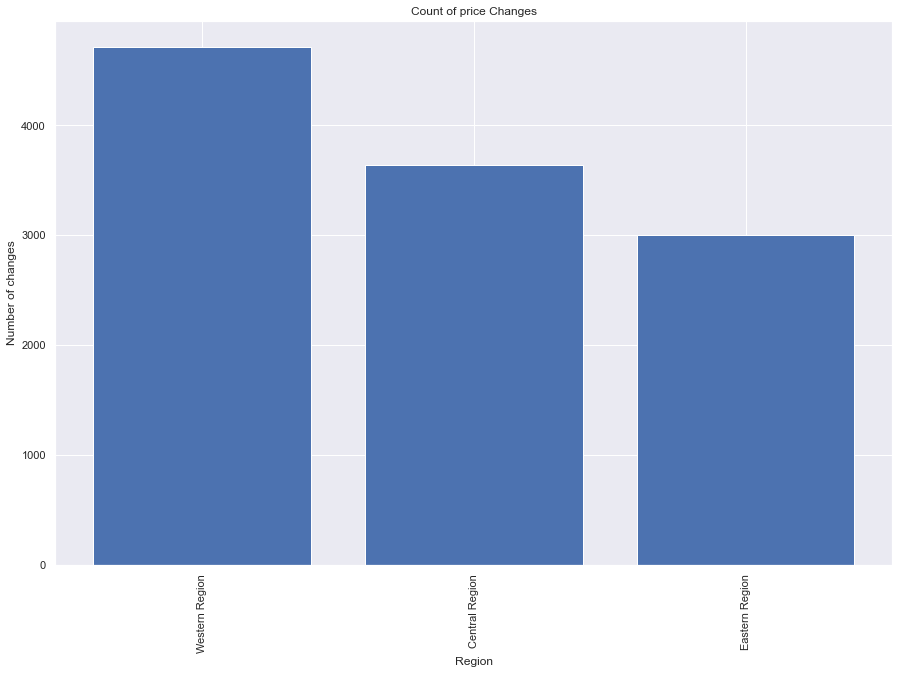

In [22]:


x = df.Region.unique()
y = df.Region.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of price Changes')
plt.xlabel('Region')
plt.ylabel('Number of changes')
plt.xticks(rotation=90)
plt.show()

#### Visualize different products and the number of changes

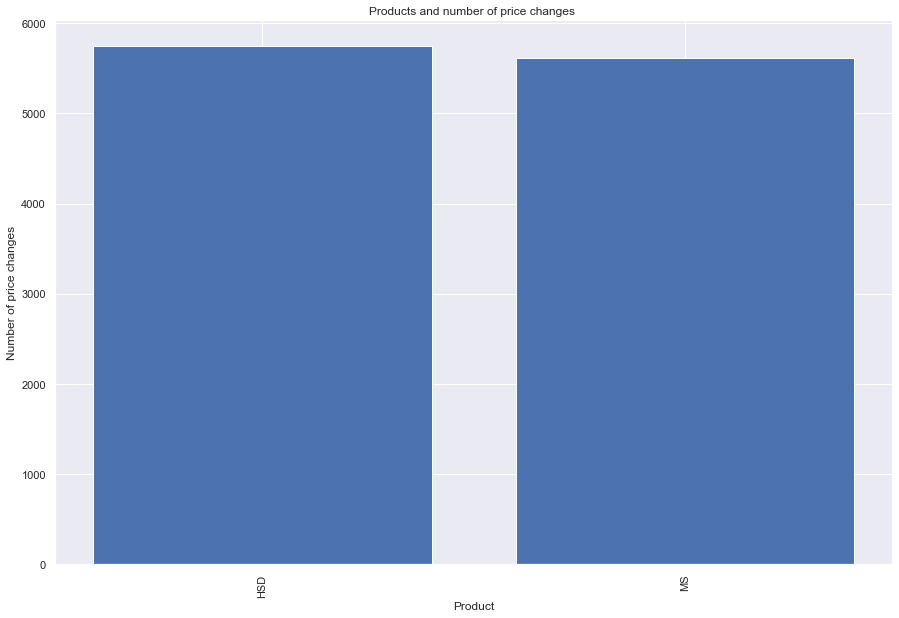

In [23]:


x = df.Product.unique()
y = df.Product.value_counts()

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Products and number of price changes ')
plt.xlabel('Product')
plt.ylabel('Number of price changes')
plt.xticks(rotation=90)
plt.show()

#### Most Fuel Price Ranges

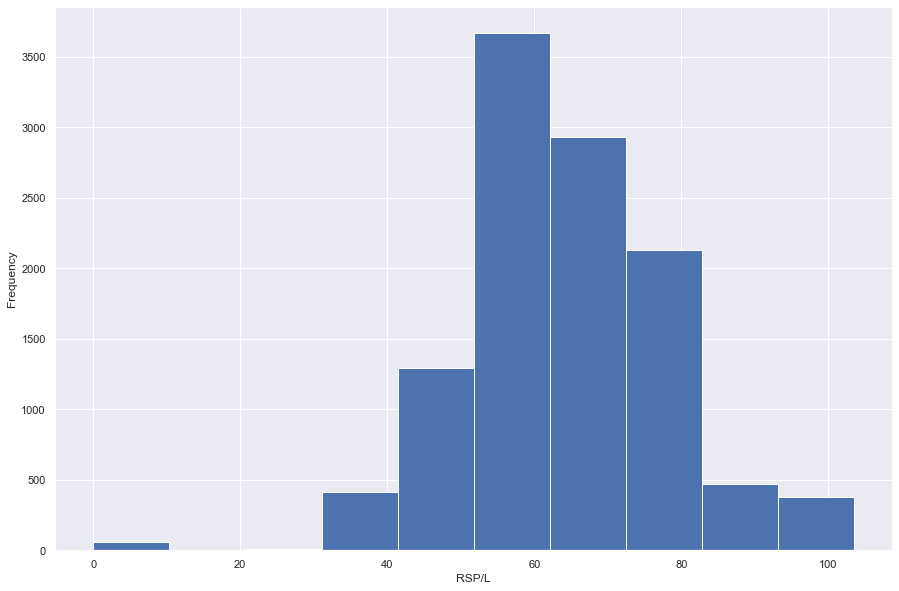

In [24]:
x = df['RSP/L']

sns.set(rc={'figure.figsize':(15,10)})
plt.hist(x)
plt.xlabel("RSP/L")
plt.ylabel("Frequency")
plt.show()


#### Ploting boxplot to check outliers in price

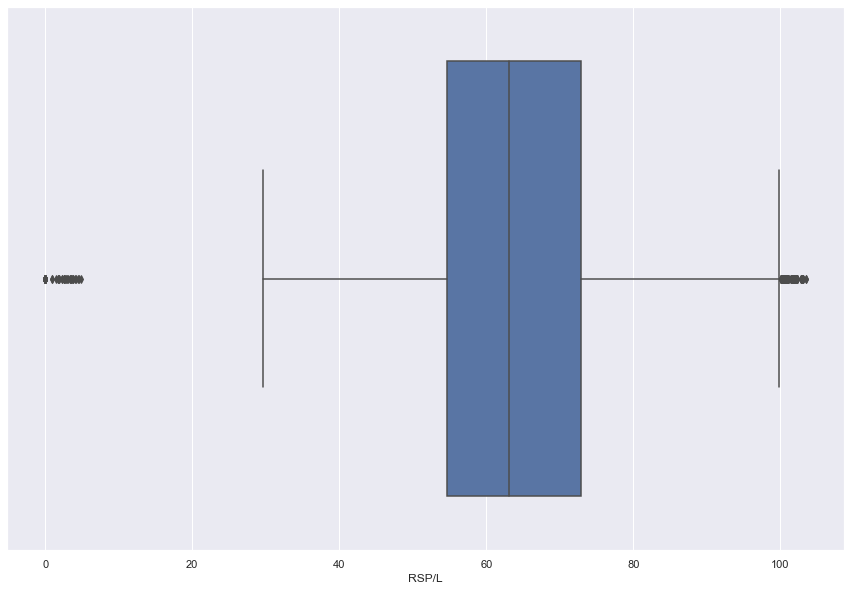

In [25]:

sns.boxplot(x=df['RSP/L'])
plt.show()

In [26]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = df['RSP/L'].quantile(0.25)
Q3 = df['RSP/L'].quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print('upper limit: {}'.format(upperlimit))
print('lower limit: {}'.format(lowerlimit))

upper limit: 99.995
lower limit: 27.555


## 2.6 Type conversion
- Approved_Date is in object type, create three new columns for Year, Month, and Day

In [27]:
df['Year'] = pd.DatetimeIndex(df['Approved_Date']).year 
df['Month'] = pd.DatetimeIndex(df['Approved_Date']).month 
df['Day'] = pd.DatetimeIndex(df['Approved_Date']).day
df

Region Product                               Company  \
0      Western Region     HSD  Bharat Petroleum Corporation Limited   
1      Western Region     HSD  Bharat Petroleum Corporation Limited   
2      Western Region     HSD  Bharat Petroleum Corporation Limited   
3      Western Region     HSD  Bharat Petroleum Corporation Limited   
4      Western Region     HSD  Bharat Petroleum Corporation Limited   
...               ...     ...                                   ...   
11372  Central Region      MS        Indian Oil Corporation Limited   
11373  Central Region      MS        Indian Oil Corporation Limited   
11374  Central Region      MS        Indian Oil Corporation Limited   
11375  Central Region      MS        Indian Oil Corporation Limited   
11376  Central Region      MS        Indian Oil Corporation Limited   

      Approved_Date        Station   RSP/L  Year  Month  Day  
0        2022-04-01  Phuentsholing   98.50  2022      4    1  
1        2022-04-01    Rinchending   98.58  2022      4    1  
2        2022-04-01        Pasakha   98.63  2022      4    1  
3        2022-04-01     Chimakothi  100.21  2022      4    1  
4        2022-04-01   Lungtenzampa  100.65  2022      4    1  
...             ...            ...     ...   ...    ...  ...  
11372    2020-05-06         Dagana   42.16  2020      5    6  
11373    2020-05-06  Lhamoizingkha   41.07  2020      5    6  
11374    2020-05-06       Dangdung   43.47  2020      5    6  
11375    2020-05-06        Panbang   41.61  2020      5    6  
11376    2020-05-06       Tingtibi   41.22  2020      5    6  

[11359 rows x 9 columns]

#### Drop the Approved_Date column

In [28]:
df = df.drop(columns='Approved_Date', axis=1)
df

Region Product                               Company  \
0      Western Region     HSD  Bharat Petroleum Corporation Limited   
1      Western Region     HSD  Bharat Petroleum Corporation Limited   
2      Western Region     HSD  Bharat Petroleum Corporation Limited   
3      Western Region     HSD  Bharat Petroleum Corporation Limited   
4      Western Region     HSD  Bharat Petroleum Corporation Limited   
...               ...     ...                                   ...   
11372  Central Region      MS        Indian Oil Corporation Limited   
11373  Central Region      MS        Indian Oil Corporation Limited   
11374  Central Region      MS        Indian Oil Corporation Limited   
11375  Central Region      MS        Indian Oil Corporation Limited   
11376  Central Region      MS        Indian Oil Corporation Limited   

             Station   RSP/L  Year  Month  Day  
0      Phuentsholing   98.50  2022      4    1  
1        Rinchending   98.58  2022      4    1  
2            Pasakha   98.63  2022      4    1  
3         Chimakothi  100.21  2022      4    1  
4       Lungtenzampa  100.65  2022      4    1  
...              ...     ...   ...    ...  ...  
11372         Dagana   42.16  2020      5    6  
11373  Lhamoizingkha   41.07  2020      5    6  
11374       Dangdung   43.47  2020      5    6  
11375        Panbang   41.61  2020      5    6  
11376       Tingtibi   41.22  2020      5    6  

[11359 rows x 8 columns]

In [29]:
df.dtypes

Region      object
Product     object
Company     object
Station     object
RSP/L      float64
Year         int64
Month        int64
Day          int64
dtype: object

# 3. Handling Missing Values 

- All the categorical data stored in `categorical_features` and numerical data in `numerical features`


- Checking missing values 

In [30]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.head()

RSP/L  Year  Month  Day
0   98.50  2022      4    1
1   98.58  2022      4    1
2   98.63  2022      4    1
3  100.21  2022      4    1
4  100.65  2022      4    1

In [31]:
numerical_features.isnull().sum()


RSP/L    0
Year     0
Month    0
Day      0
dtype: int64

In [32]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.head()

Region Product                               Company        Station
0  Western Region     HSD  Bharat Petroleum Corporation Limited  Phuentsholing
1  Western Region     HSD  Bharat Petroleum Corporation Limited    Rinchending
2  Western Region     HSD  Bharat Petroleum Corporation Limited        Pasakha
3  Western Region     HSD  Bharat Petroleum Corporation Limited     Chimakothi
4  Western Region     HSD  Bharat Petroleum Corporation Limited   Lungtenzampa

In [33]:
categorical_features.isnull().sum()


Region      0
Product     0
Company    15
Station    29
dtype: int64

## 3.1. Handling Categorical Missing values 
- We will use sklearn SimpleImputer to impute categorical values with most frequest values.

- Check missing records after imputation

In [34]:

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(categorical_features)
imp = imp.transform(categorical_features)

In [35]:
categorical_features = pd.DataFrame(imp, columns=categorical_features.columns)
categorical_features.head()

Region Product                               Company        Station
0  Western Region     HSD  Bharat Petroleum Corporation Limited  Phuentsholing
1  Western Region     HSD  Bharat Petroleum Corporation Limited    Rinchending
2  Western Region     HSD  Bharat Petroleum Corporation Limited        Pasakha
3  Western Region     HSD  Bharat Petroleum Corporation Limited     Chimakothi
4  Western Region     HSD  Bharat Petroleum Corporation Limited   Lungtenzampa

In [36]:
categorical_features.isnull().sum()

Region     0
Product    0
Company    0
Station    0
dtype: int64

## 3.2. Handling Numerical Missing values 

- We will use sklearn SimpleImputer to impute numerical null values with mean values.
- Check missing records after imputation

In [37]:

# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp = imp.fit(numerical_features)
# imp = imp.transform(numerical_features)
# imp

In [38]:
# numerical_features = pd.DataFrame(imp, columns=numerical_features.columns)
# numerical_features.head()

In [39]:
# numerical_features.isnull().sum()

# 4. Scaling Numerical Features
- scaling all the numerical features using StandardScaler

In [40]:
# store target column as targetdf
target = numerical_features['RSP/L']
targetdf = pd.DataFrame(target, columns=['RSP/L'])
targetdf.head()

RSP/L
0   98.50
1   98.58
2   98.63
3  100.21
4  100.65

In [41]:
# scaler = StandardScaler()
# target_scaled = scaler.fit_transform(targetdf)
# targetdf = pd.DataFrame(target_scaled, columns=['RSP/L'])
# targetdf.head()

In [42]:

scaler = StandardScaler()
scaled = scaler.fit_transform(numerical_features.drop(columns='RSP/L', axis=1))
scaled

array([[ 1.84471262, -0.53051264, -1.02861456],
       [ 1.84471262, -0.53051264, -1.02861456],
       [ 1.84471262, -0.53051264, -1.02861456],
       ...,
       [-0.99960537, -0.24861653, -0.3520794 ],
       [-0.99960537, -0.24861653, -0.3520794 ],
       [-0.99960537, -0.24861653, -0.3520794 ]])

In [43]:
numerical_features = pd.DataFrame(scaled, columns=['Year', 'Month', 'Day'])
numerical_features.head()

Year     Month       Day
0  1.844713 -0.530513 -1.028615
1  1.844713 -0.530513 -1.028615
2  1.844713 -0.530513 -1.028615
3  1.844713 -0.530513 -1.028615
4  1.844713 -0.530513 -1.028615

# 5. Encode Categorical data
- We will encode all features using OrdinalEncoder and get_dummies
- Store the targetdf as `y`
- Finally join Categorical and Numerical features together in single dataframe `X`


In [44]:

enc = OrdinalEncoder()

# productdf = categorical_features[['Product']]

enc_categorical = enc.fit_transform(categorical_features)

categorical_features = pd.DataFrame(enc_categorical, columns=categorical_features.columns)
categorical_features.head()

Region  Product  Company  Station
0     2.0      0.0      0.0     45.0
1     2.0      0.0      0.0     52.0
2     2.0      0.0      0.0     43.0
3     2.0      0.0      0.0      7.0
4     2.0      0.0      0.0     31.0

In [45]:

y = targetdf
y

RSP/L
0       98.50
1       98.58
2       98.63
3      100.21
4      100.65
...       ...
11372   42.16
11373   41.07
11374   43.47
11375   41.61
11376   41.22

[11359 rows x 1 columns]

In [46]:
# # from sklearn.preprocessing import OneHotEncoder

# one_hot_encoded_data = pd.get_dummies(productdf, columns = ['Product'])
# newdf = one_hot_encoded_data
# newdf.head()

In [47]:
X = pd.concat([numerical_features, categorical_features], axis=1)
X.head()

Year     Month       Day  Region  Product  Company  Station
0  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     45.0
1  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     52.0
2  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     43.0
3  1.844713 -0.530513 -1.028615     2.0      0.0      0.0      7.0
4  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     31.0

In [48]:
df = pd.concat([X, y], axis=1)
df.head()

Year     Month       Day  Region  Product  Company  Station   RSP/L
0  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     45.0   98.50
1  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     52.0   98.58
2  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     43.0   98.63
3  1.844713 -0.530513 -1.028615     2.0      0.0      0.0      7.0  100.21
4  1.844713 -0.530513 -1.028615     2.0      0.0      0.0     31.0  100.65

In [49]:
df.corr()

Year     Month       Day    Region   Product   Company   Station  \
Year     1.000000 -0.260589 -0.066509  0.045729 -0.015516  0.028362  0.000217   
Month   -0.260589  1.000000 -0.063359  0.008368  0.011901  0.010628  0.000618   
Day     -0.066509 -0.063359  1.000000  0.025705 -0.015488  0.003804 -0.006074   
Region   0.045729  0.008368  0.025705  1.000000 -0.004264  0.020726 -0.080766   
Product -0.015516  0.011901 -0.015488 -0.004264  1.000000 -0.000227  0.004207   
Company  0.028362  0.010628  0.003804  0.020726 -0.000227  1.000000  0.007814   
Station  0.000217  0.000618 -0.006074 -0.080766  0.004207  0.007814  1.000000   
RSP/L    0.777966 -0.025701 -0.029779  0.053975  0.022752  0.013797  0.013725   

            RSP/L  
Year     0.777966  
Month   -0.025701  
Day     -0.029779  
Region   0.053975  
Product  0.022752  
Company  0.013797  
Station  0.013725  
RSP/L    1.000000

<AxesSubplot:>

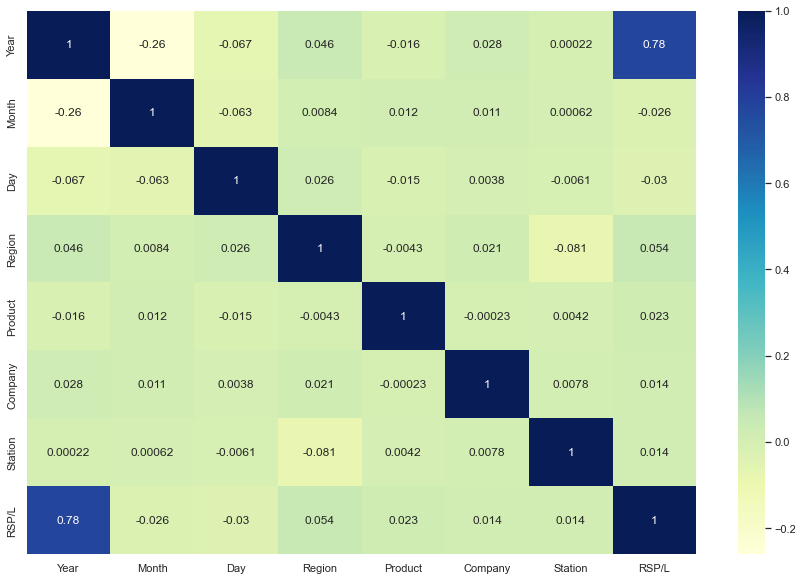

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu',)

In [51]:
# from sklearn.feature_selection import f_classif, SelectKBest
# fs = SelectKBest(score_func=f_classif, k='all')
# X_selected = fs.fit_transform(X, target)
# Xdf = pd.DataFrame(X_selected, columns=df.drop('RSP/L', axis=1).columns)

In [52]:
# sns.set(rc={'figure.figsize':(15,10)})
# sns.heatmap(Xdf.corr(), annot=True, cmap='YlGnBu',)

# 6. Training Model 

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

### Linear Regression

In [54]:

lr = LinearRegression()

# train the model using the training sets
lr.fit(X_train, y_train)



LinearRegression()

### DecisionTreeRegressor

In [55]:
# decision tree

from sklearn.tree import DecisionTreeRegressor

dst = DecisionTreeRegressor()
dst.fit(X_train,y_train)

DecisionTreeRegressor()

KNNRegressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors = 6)
knnr.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=6)

### RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(np.array(X_train), y_train.values.ravel())

RandomForestRegressor()

### GradientBoostingRegressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 3, random_state = 1)
  
# Fit to training set
gbr.fit(X_train, y_train)
  


GradientBoostingRegressor(n_estimators=200, random_state=1)

# 7. Evaluating the model 

- Use score method to check accuracy of all the models



In [59]:
lr.score(X_train, y_train)

0.6632914369134235

In [60]:
lr.score(X_test, y_test)

0.660495086065137

In [61]:
knnr.score(X_train, y_train)

0.8329002007381492

In [62]:
knnr.score(X_test, y_test)

0.7749702742270962

#### Score graph for different value of k for KNeighborsRegressor

In [63]:
trainscore = []
testscore = []
for k in range(1,50):
    knnrmodel = KNeighborsRegressor(n_neighbors=k)
    knnrmodel.fit(X_train,y_train)
    trainscore.append(knnrmodel.score(X_train,y_train))
    testscore.append(knnrmodel.score(X_test,y_test))    

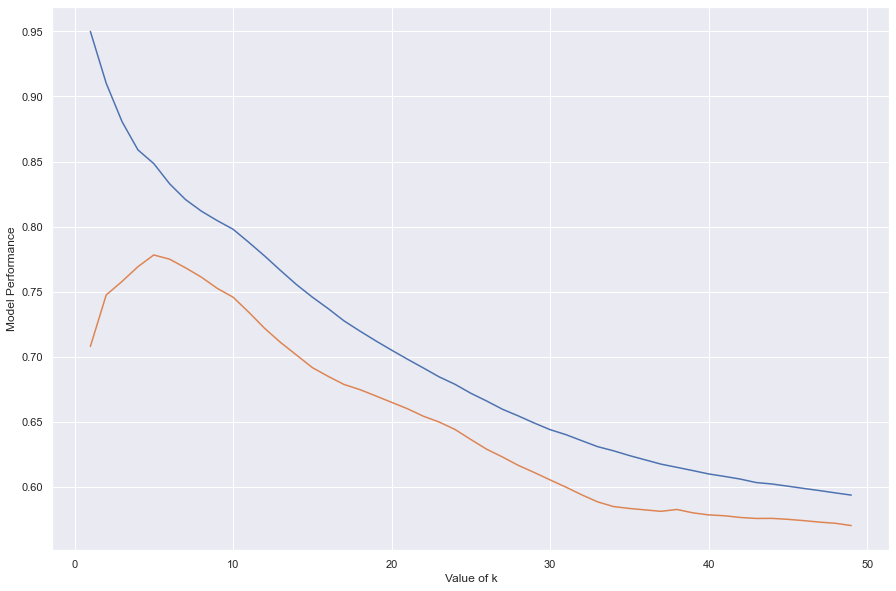

In [64]:
sns.lineplot(x = np.arange(1,50),y = trainscore)
sns.lineplot(x = np.arange(1,50),y = testscore)
plt.xlabel("Value of k")
plt.ylabel("Model Performance")
plt.show()

In [65]:
dst.score(X_train,y_train)

0.9740781140912684

In [66]:
dst.score(X_test,y_test)

0.9246042137794824

In [67]:
rfmodel.score(X_train, y_train)

0.9718966858331965

In [68]:
rfmodel.score(X_test, y_test)

0.9377965250368863

In [69]:
gbr.score(X_train, y_train)

0.9319183725119277

In [70]:
gbr.score(X_test, y_test)

0.9357906097096079

#### Score graph for different value of estimators for GradientBoostingRegressor

In [71]:
trainscore = []
testscore = []
for n in range(100,300):
    gbr = GradientBoostingRegressor(n_estimators = n, max_depth = 3, random_state = 1) # defualt max_depth
    gbr.fit(X_train,y_train)
    trainscore.append(gbr.score(X_train,y_train))
    testscore.append(gbr.score(X_test,y_test))    

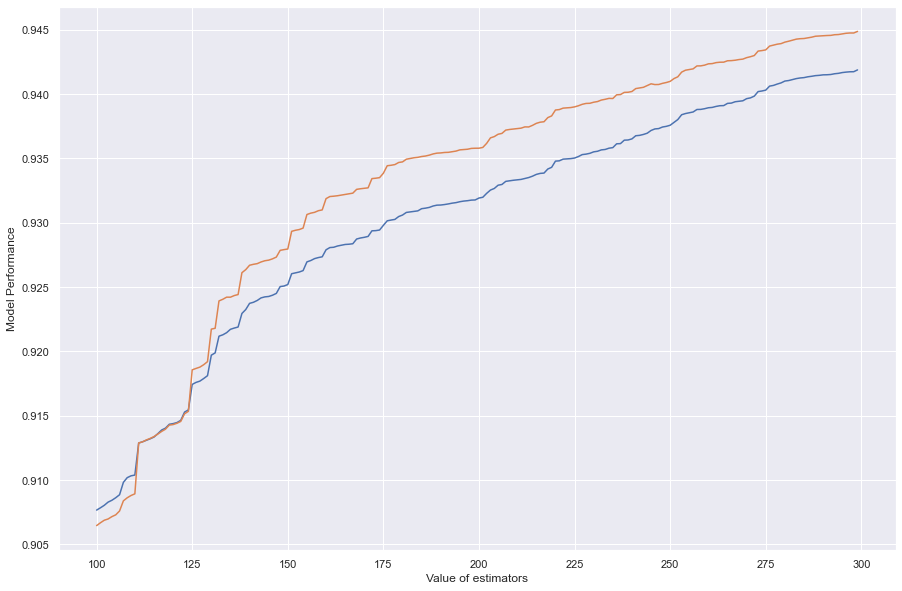

In [72]:
sns.lineplot(x = np.arange(100,300),y = trainscore)
sns.lineplot(x = np.arange(100,300),y = testscore)
plt.xlabel("Value of estimators")
plt.ylabel("Model Performance")
plt.show()

# 8. Making Prediction 
- Take any sample record from your training data and make prediction.

#### Prediction using Linear regression

In [73]:
y_pred = lr.predict(X_test)


In [74]:
pd.DataFrame(y_pred, columns=['Predicted'])

Predicted
0     54.499813
1     59.972815
2     70.260837
3     69.469992
4     72.296353
...         ...
2267  69.753819
2268  51.036418
2269  53.523288
2270  48.052614
2271  70.239835

[2272 rows x 1 columns]

In [75]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 5.309709175531989
Mean Squared Error: 67.73407113481932
Root Mean Squared Error: 8.230071150045989
R2 score : 0.660495


#### Train MSE and Test MSE graph for different k

In [76]:

trainMSE = []
testMSE = []

for k in range(1,50):
    knnr = KNeighborsRegressor(n_neighbors = k)
    knnr.fit(X_train,y_train)
    ypred_tr = knnr.predict(X_train)
    ypred_te = knnr.predict(X_test)

    trainMSE.append(mean_squared_error(y_train,ypred_tr))
    testMSE.append(mean_squared_error(y_test,ypred_te))

    

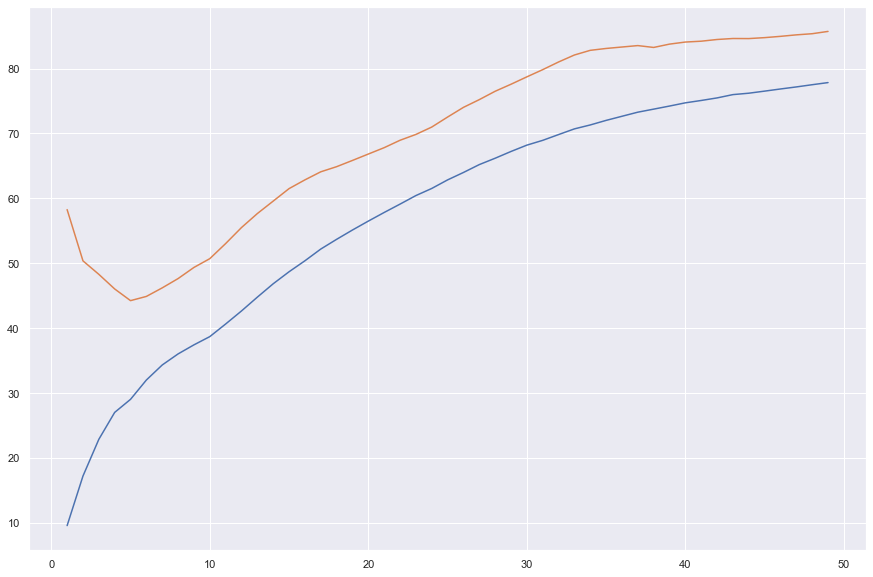

In [77]:
plt.plot(np.arange(1,50),trainMSE)
plt.plot(np.arange(1,50),testMSE)
plt.show()

#### Prediction using KNNRegressor

In [78]:
y_pred = knnr.predict(X_test)


In [79]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 6.80166391204369
Mean Squared Error: 85.73068059515987
Root Mean Squared Error: 9.259086380154354
R2 score : 0.570290


#### Prediction using Decision Tree model

In [80]:
y_pred = pd.DataFrame(dst.predict(X_test))

In [81]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.8987056924882628
Mean Squared Error: 15.042090224667447
Root Mean Squared Error: 3.8784133643369483
R2 score : 0.924604


In [82]:
y_pred.columns = ['Pedicted price']
y_pred

Pedicted price
0              54.76
1              61.44
2              69.67
3              69.12
4              80.90
...              ...
2267           71.69
2268           50.41
2269           29.96
2270           63.38
2271           69.33

[2272 rows x 1 columns]

#### Prediction using RandomForest model

In [83]:
y_pred = rfmodel.predict(X_test)

In [84]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.960046618055884
Mean Squared Error: 12.410113742250143
Root Mean Squared Error: 3.522799134530685
R2 score : 0.937797


In [85]:
pd.DataFrame(y_pred, columns=['Predicted'])

Predicted
0     54.849900
1     60.616300
2     71.156000
3     69.145400
4     82.748300
...         ...
2267  71.226500
2268  50.258400
2269  33.483000
2270  63.602007
2271  69.601100

[2272 rows x 1 columns]

In [86]:
y_test

RSP/L
10605  54.70
8373   59.02
3423   71.70
4549   69.09
1449   81.75
...      ...
2231   68.55
10832  50.71
5560   29.67
7065   64.02
1134   69.33

[2272 rows x 1 columns]

#### Prediction using GradientBoostingRegressor

In [87]:
y_pred = gbr.predict(X_test)

In [88]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 1.5916644382384624
Mean Squared Error: 10.999610292884539
Root Mean Squared Error: 3.316566039276851
R2 score : 0.944866


In [89]:
y_pred = pd.DataFrame(gbr.predict(X_test), columns=['Predicted price'])
y_pred

Predicted price
0           55.557778
1           58.245124
2           73.119363
3           68.559956
4           81.968697
...               ...
2267        68.826598
2268        47.323514
2269        36.018863
2270        63.021693
2271        69.987398

[2272 rows x 1 columns]

In [90]:
y_test

RSP/L
10605  54.70
8373   59.02
3423   71.70
4549   69.09
1449   81.75
...      ...
2231   68.55
10832  50.71
5560   29.67
7065   64.02
1134   69.33

[2272 rows x 1 columns]

In [91]:

trainMSE = []
testMSE = []

for n in range(100,300):
    gbr = GradientBoostingRegressor(n_estimators = n, max_depth = 3, random_state = 1)
    gbr.fit(X_train,y_train)
    ypred_tr = gbr.predict(X_train)
    ypred_te = gbr.predict(X_test)

    trainMSE.append(mean_squared_error(y_train,ypred_tr))
    testMSE.append(mean_squared_error(y_test,ypred_te))


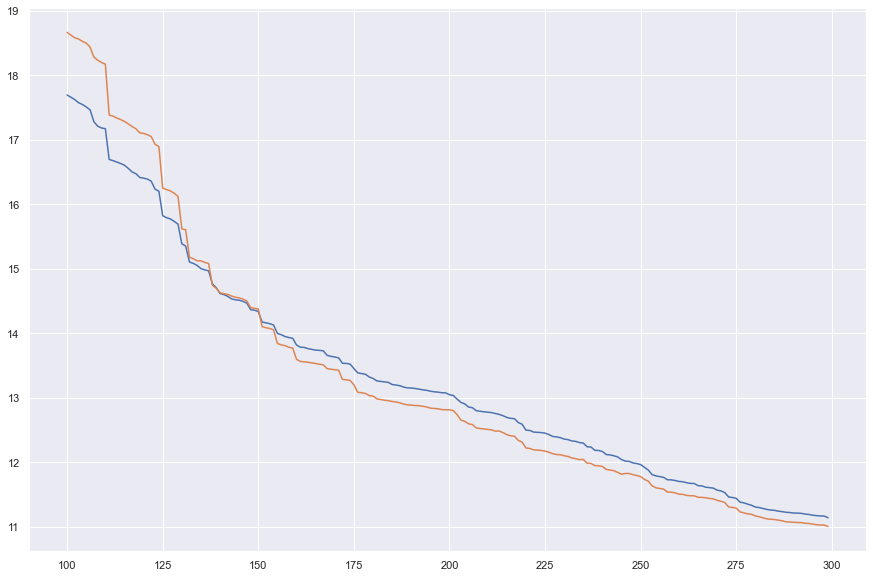

In [92]:
plt.plot(np.arange(100,300),trainMSE)
plt.plot(np.arange(100,300),testMSE)
plt.show()

In [93]:
lr.predict(np.array(X_test)[0].reshape(1, 7))

array([[54.49981324]])

In [94]:
dst.predict(np.array(X_test)[0].reshape(1, 7))

array([54.76])

In [95]:
rfmodel.predict(np.array(X_test)[0].reshape(1, 7))

array([54.8499])

In [96]:
gbr.predict(np.array(X_test)[0].reshape(1, 7))

array([55.55777775])

In [97]:
print('actual: {}'.format(np.array(y_test)[0]))

actual: [54.7]


### Save the model

In [98]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(lr, 'lrmodel.pkl')
joblib.dump(knnr, 'knnrmodel.pkl')
joblib.dump(dst, 'dstmodel.pkl')
joblib.dump(rfmodel, 'rfmodel.pkl')
joblib.dump(gbr, 'gbrmodel.pkl')

['gbrmodel.pkl']

In [99]:
# LSTM model

In [100]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

In [101]:
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model.add(LSTM(50, return_sequences= True))
# model.add(LSTM(50, return_sequences= False))
# model.add(Dense(25))
# model.add(Dense(1))

In [102]:
# model.compile(optimizer='adam', loss='mean_squared_error')

In [103]:
# model.fit(X_train, y_train, batch_size=16, epochs=2)

In [104]:
# score, acc = model.evaluate(X_train, y_train, batch_size = 32) 
   
# print('Train score:', score) 
# print('Train accuracy:', acc)

In [105]:
# score, acc = model.evaluate(X_test, y_test, batch_size = 32) 
   
# print('Test score:', score) 
# print('Test accuracy:', acc)